# Data Cleaning and EDA (Exploratory Data Analysis)

Cleans and explores the data for use in preprocessing.

In [1]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import json

from skimage import io
import skimage
import cv2
import cvzone
from cvzone.SelfiSegmentationModule import SelfiSegmentation

from keras.utils import np_utils
import tensorflow as tf
import keras

import glob
import os

import random

with open('config.json', 'r') as file:
    config = json.load(file)

data_path = config['data_path']

classes = os.listdir(data_path + "/MY_data/train")

In [2]:
classes

['Apple',
 'avocado',
 'Banana',
 'cherry',
 'kiwi',
 'mango',
 'orange',
 'pinenapple',
 'strawberries',
 'watermelon']

## Visual Inspection 

Printing out images from each class to see what the training sets look like.

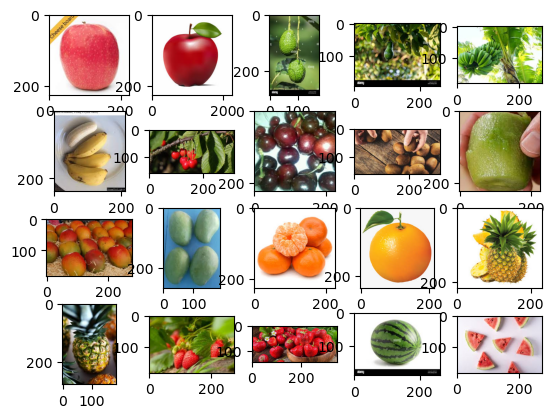

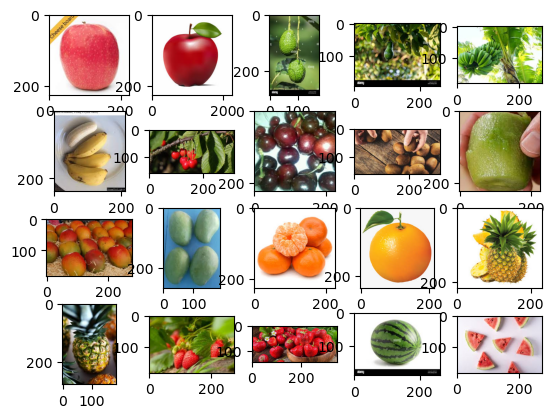

In [6]:
paths = []
for img_class in classes:
    img_names = os.listdir(data_path + "/MY_data/train/" + img_class)

    names = random.sample(img_names, 2)

    paths.append(data_path + '/MY_data/train/' + img_class + '/' + names[0])
    paths.append(data_path + '/MY_data/train/' + img_class + '/' + names[1])
    

    # io.imread(data_path + '/MY_data/train/' + img_class + '/' + names[0])
    # imshow(data_path + '/MY_data/train/' + img_class + '/' + names[0])
    # show()

    # io.imread(data_path + '/MY_data/train/' + img_class + '/' + names[1])
    # imshow(data_path + '/MY_data/train/' + img_class + '/' + names[1])
    # show()
io.imshow_collection([io.imread(path) for path in paths])

## Analysis

From looking at the dataset, object detection is going to be very important. In each image, there is a very noisy background that would prevent the model from looking at the correct image. Let's try to clean the dataset by removing the background in each image and normalize the size of the images.

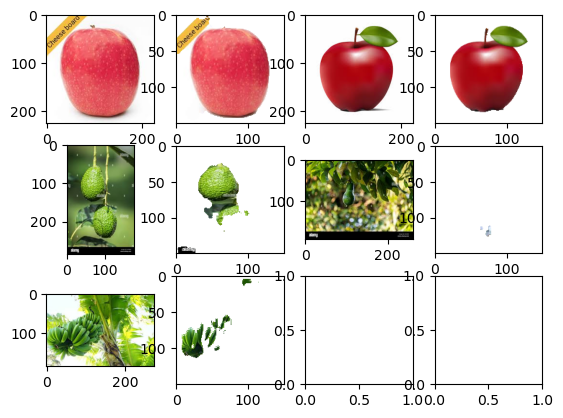

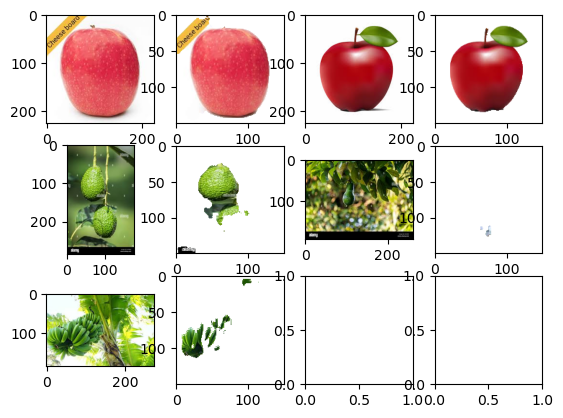

In [7]:
collection = [] 
thresh = .3
white_thresh = .7
for path in paths[:5]:
    img = io.imread(path)



    segmentor = SelfiSegmentation()

   

    # resizing to a more reasonable size
    img = cv2.resize(img, (150, 150))

    white = (255, 255, 255)

    img_nobg = segmentor.removeBG(img, white, threshold=thresh)

    collection.append(img)
    collection.append(img_nobg)

    

io.imshow_collection(collection)

## Analysis
This method for removing the background works pretty well, but doesn't handle images that are don't have backgrounds very well; it just leaves an empty, or close to empty image. I'll set a threshold for the amount of color in an image to replace it with the original.

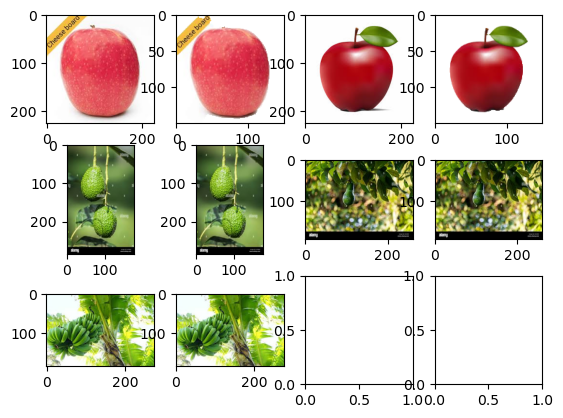

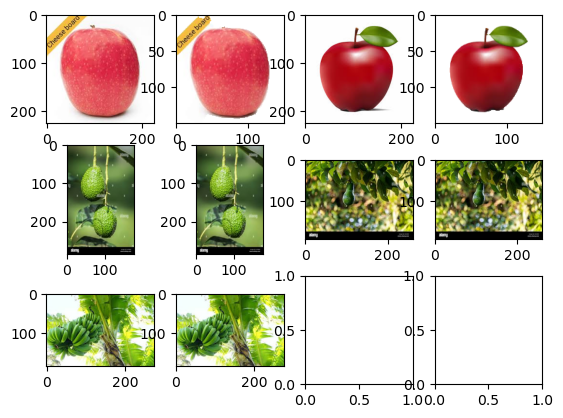

In [9]:
collection = [] 
thresh = .3
white_thresh = .7
for path in paths[:5]:
    img = io.imread(path)



    segmentor = SelfiSegmentation()

   

    # resizing to a more reasonable size
    img = cv2.resize(img, (150, 150))

    white = (255, 255, 255)

    img_nobg = segmentor.removeBG(img, white, threshold=thresh)
    
    white_percentage = np.sum(img_nobg == 255)/(np.sum(img_nobg == 255) + np.sum(img_nobg != 255))   
    
    if  white_percentage > white_thresh:

        collection.append(img)
        collection.append(img)
    else:
        collection.append(img)
        collection.append(imgNoBg)

    

io.imshow_collection(collection)

## Analysis

This is looking pretty good for most of the images. I'm deciding to leave the color because each fruit has a certain set of colors unique to just that fruit.

In [12]:
from datetime import datetime

datetime.today().day

28